## Παραδοτέο 1

Παρακάτω, έχουμε τροποποιήσει τον αρχικό κώδικα της Εργαστηριακής Άσκησης 2, ώστε η πιθανότητα $p$ να παίρνει τιμές από 0.02 έως 0.98.
Κατόπιν, έχουμε σχεδιάσει το διάγραμμα για τις μέσες τιμές που καταγράφηκαν για την εκτιμήτρια, με χρήση της matplotlib. 

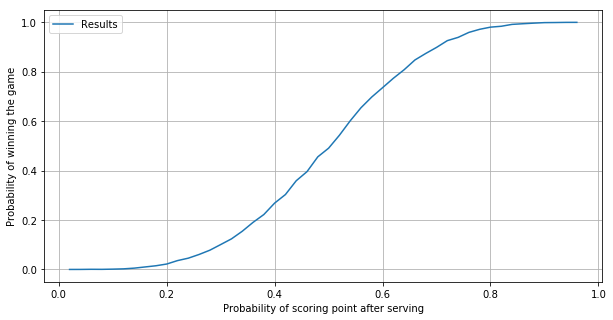

In [1]:
import numpy as np
import random
from simple_markov_chain_lib import markov_chain
import matplotlib.pyplot as plt
import statistics as stat
import math

%matplotlib inline

random.seed(2016) 


probs = np.arange(0.02, 0.98, 0.02)
means = []
variances = []

for p in probs:
    q = 1-p

    init_probs = {0: 1.0} 
 
    markov_table = {
        0: {1: p, 2: q},       # 0  -> 0-0
        1: {3: p, 4: q},       # 1  -> 15-0
        2: {4: p, 5: q},       # 2  -> 0-15
        3: {6: p, 7: q},       # 3  -> 30-0
        4: {7: p, 8: q},       # 4  -> 15-15
        5: {8: p, 9: q},       # 5  -> 0-30
        6: {10: q, 15: p},     # 6  -> 40-0
        7: {10: p, 11: q},     # 7  -> 30-15
        8: {11: p, 12: q},     # 8  -> 15-30
        9: {12: p, 16: q},     # 9  -> 0-40
        10: {13: q, 15: p},    # 10 -> 40-15
        11: {13: p, 14: q},    # 11 -> 30-30   ("Deuce")
        12: {14: p, 16: q},    # 12 -> 15-40
        13: {11: q, 15: p},    # 13 -> 40-30
        14: {11: p, 16: q},    # 14 -> 30-40
        15: {15: 1.},          # 15 -> "A wins"
        16: {16: 1.}           # 16 -> "B wins"
    }
 
    mc = markov_chain(markov_table, init_probs)

    N = 200      # number of samples
    steps = 50   # the target time
    M = 50       # number of iterations of initial experiment

    estimates=[]

    for k in range(M):
        counter = 0
        for i in range(N):
            mc.start() 
            for j in range(steps):  mc.move()
            if mc.running_state == 15:  counter += 1

        phat = counter / N
        estimates.append(phat)

    means.append(stat.mean(estimates))
    variances.append(stat.variance(estimates))
    
means = np.array(means)

plt.figure(figsize=(10, 5)) 


plt.plot(probs, means.T, label="Results")
plt.xlabel("Probability of scoring point after serving")
plt.ylabel("Probability of winning the game")
plt.grid(True)

plt.legend()
pass



Παρατηρούμε ότι η γραφική παράσταση τείνει προς τη σιγμοειδή συνάρτηση $1/(1+e^{-a(x-0.5)})$. Η προκύπτουσα συνάρτηση είναι αρχικά κυρτή και στη συνέχεια κοίλη. Όταν $p \rightarrow 0$, τότε η πιθανότητα νίκης του παίκτη Α τείνει επίσης στο 0. Αντιστοίχως, όταν $p \rightarrow 1$, η πιθανότητα νίκης του Α τείνει και αυτή στο 1.


## Παραδοτέο 2

Ο κώδικας της άσκησης φαίνεται παρακάτω:

Slope of function is -0.986


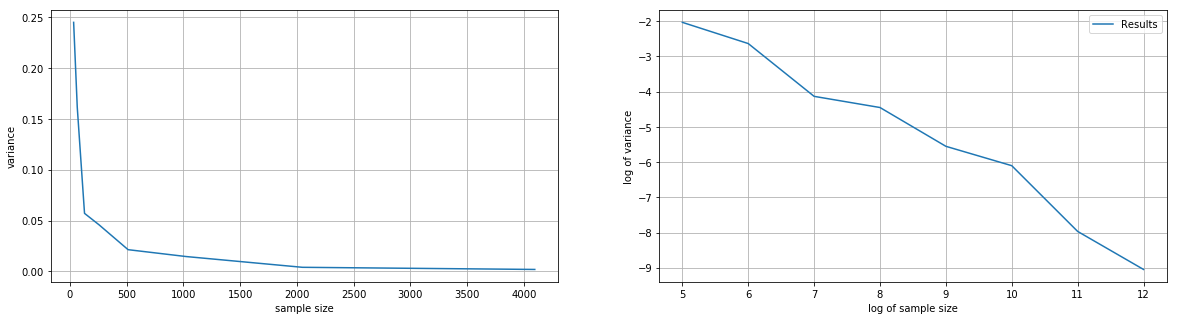

In [2]:
markov_table = {
    0: {1: .5, 2: .5},  
    1: {0: 1/3, 3: 2/3},
    2: {2: 1.},
    3: {0: .5, 3: .25, 4: .25},
    4: {4: 1.}
}

init_dist = {0: 1.}  

mc = markov_chain(markov_table, init_dist)

sample_sizes = []
variances = []

for i in range(5, 12+1):
    sample_size = 2**i
    sample_sizes.append(sample_size)
    
    a = []
    
    for j in range(30):
        running_total = 0
        for k in range(sample_size):
            mc.start()
            while mc.running_state != 2 and mc.running_state != 4:
                mc.move()
            running_total += mc.steps  
        mc_estimate = running_total / sample_size
        a.append(mc_estimate)
        
    variances.append(np.var(np.array(a)))
    
sample_sizes = np.array(sample_sizes)
variances = np.array(variances)

logx = np.log2(sample_sizes)
logy = np.log2(variances)
deg = np.polyfit(logx, logy, 1)

plt.figure(figsize=(20, 5)) 

plt.subplot(1,2,1) 
plt.plot(sample_sizes, variances, label="Results")
plt.xlabel("sample size")
plt.ylabel("variance")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(logx, logy, label="Results")
plt.xlabel("log of sample size")
plt.ylabel("log of variance")
plt.legend()
plt.grid(True)

print("Slope of function is {0:.3f}".format(deg[0]))
pass 

Με γραμμική παρεμβολή, με τη μέθοδο np.polyfit, έχουμε υπολογίσει για το διάγραμμα σε λογαριθμική κλίμακα την κλίση της ευθείας, που είναι ίση με -1 περίπου.  
Για το διάγραμμα σε λογαριθμική κλίμακα, ισχύει η σχέση $\log y = a \log x + b \Rightarrow 2^{\log y} = 2^{a \log x + b} \Rightarrow y = 2^b x^a$, και αν $α = -1$ (περίπου), προκύπτει ότι η διασπορά είναι αντιστόφως ανάλογη του sample size. Κάτι τέτοιο ήταν αναμενόμενο από τη θεωρία, καθώς ισχύει ότι $Var(Y) = Var(\frac{X_1 + X_2 + ... + X_n}{n}) = \frac{1}{n^2} Var(X_1 + X_2 + ... + X_n) = \frac{1}{n} Var(X)$, χρησιμοποιώντας τις γνωστές ιδιότητες της διασποράς. 